In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

warnings.filterwarnings('ignore') #remove warning messages
%matplotlib inline

wine_data = pd.read_csv('./winequality-red.csv',sep=";")#Reading the data


# COMMENT OUT TO REMOVE DUPLICATES
# wine_data.drop_duplicates(inplace = True)#Remove any duplicates
# wine_data.duplicated().sum()

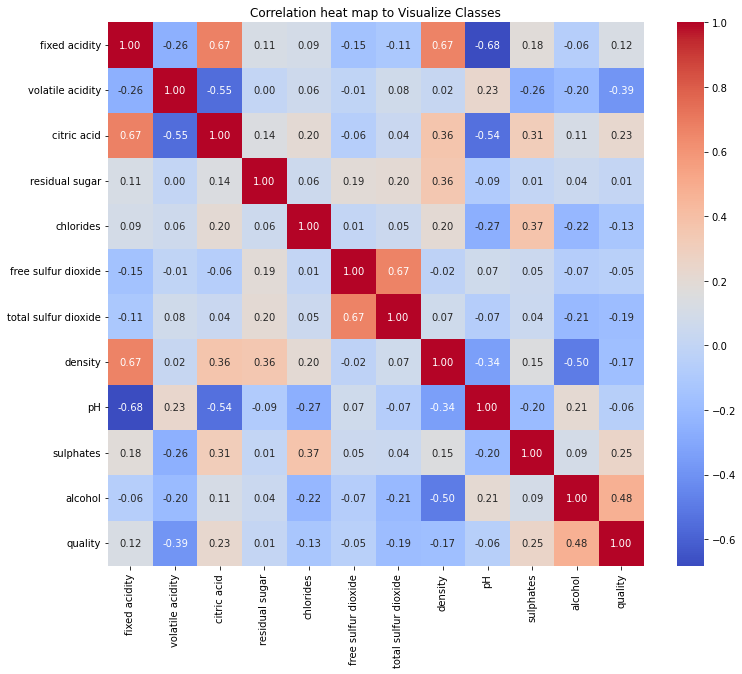

In [2]:
plt.figure(figsize=(12,10))
plt.title("Correlation heat map to Visualize Classes")
sns.heatmap(wine_data.corr(),annot=True, cmap='coolwarm',fmt='.2f');

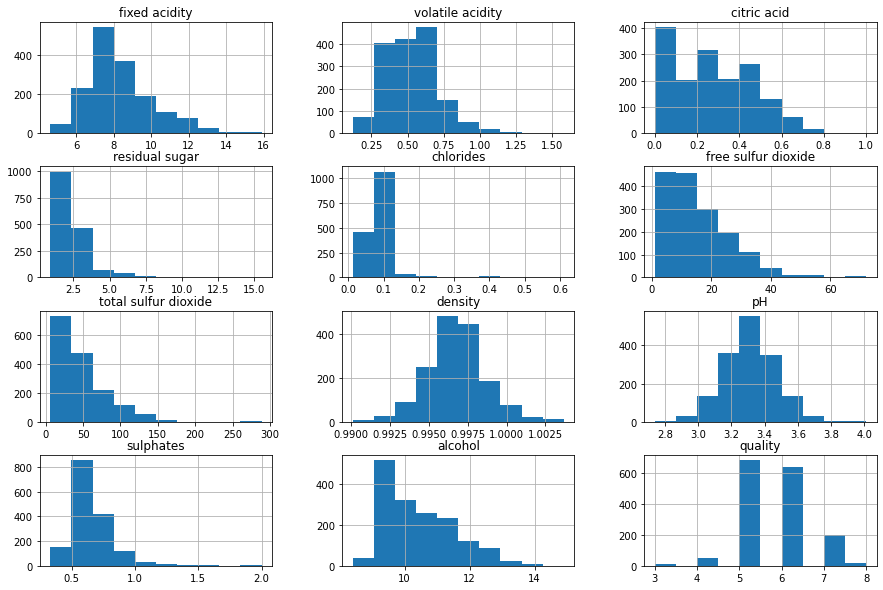

In [3]:
wine_data.hist(figsize=(15, 10))

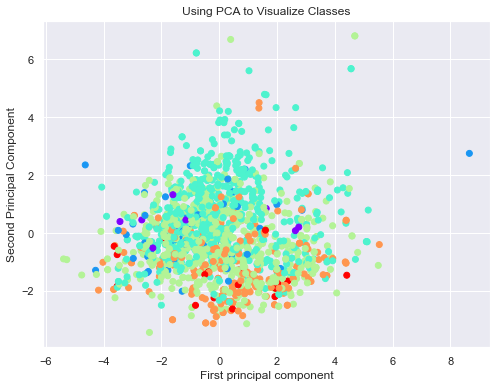

In [10]:
df_pca = wine_data.copy()
X_pca = df_pca.iloc[:, :-1]
y_pca = df_pca['quality']

X_pca.tail()

#Preprocessing in preparation for PCA: Standardizing the predictor variables
X_pca = StandardScaler().fit_transform(X_pca)

#Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

X_pca.shape

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

In [11]:
X = wine_data.drop(['quality'],axis = 1)
Y = wine_data['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state=42)

In [8]:
#Initialize the classifier
winequalityclassifier = RandomForestClassifier(random_state=417)
kfold = 3

#Create a list of parameters you want to tune
param_grid_RFC = { 
    'n_estimators': [ 3,4,5,6,8,10, 20, 30, 40, 50, 75, 100, 200, 400, 500, 700, 800,1000],
    'max_depth': [7,8,9,10,11,12,13,14,15,30,40,50,100,200,300],
    'criterion' : ['gini', 'entropy']
}

#Fit the model using grid search
CV_rfc = GridSearchCV(estimator=winequalityclassifier, param_grid=param_grid_RFC, cv= kfold)
CV_rfc.fit(x_train, y_train)
#Use the model with the best parameters to test it with the testing data
y_pred = CV_rfc.predict(x_test)
#Print the result of best hyperparameters
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 400}


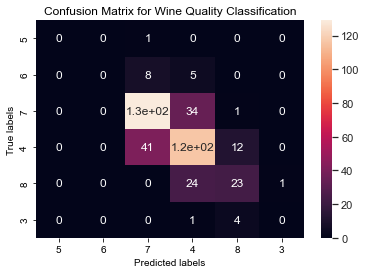

In [9]:
cm = confusion_matrix(y_test, y_pred)#Get the confusion matrix
df_cm = pd.DataFrame(cm)
ax= plt.subplot()
sns.set()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12})#Font size
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Wine Quality Classification'); 
ax.xaxis.set_ticklabels(wine_data.quality.unique()); ax.yaxis.set_ticklabels(wine_data.quality.unique())
plt.show()

In [12]:
print(classification_report(y_test, y_pred))#Get the classification report

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.72      0.79      0.75       164
           6       0.64      0.69      0.66       169
           7       0.57      0.48      0.52        48
           8       0.00      0.00      0.00         5

    accuracy                           0.67       400
   macro avg       0.32      0.33      0.32       400
weighted avg       0.64      0.67      0.65       400



In [14]:
wine_data["high_quality"] = np.where(wine_data["quality"] > 5.5, 1, 0)

In [15]:
X = wine_data.iloc[:, :11].to_numpy()
y = wine_data.iloc[:, -1].to_numpy()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=12)

In [16]:
params = {"C": np.linspace(0.05, 1.5, 30),
            "kernel": ['linear', 'poly', 'rbf', 'sigmoid'], 
            "degree": range(1, 11)}

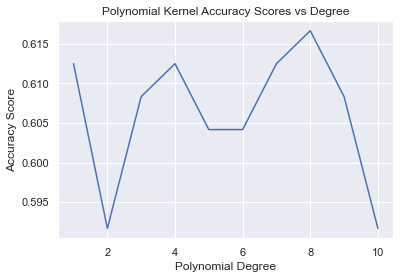

In [17]:
acc = []

for d in params["degree"]:
    y_pred = SVC(kernel="poly", degree=d).fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["degree"], acc)
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy Score")
plt.title("Polynomial Kernel Accuracy Scores vs Degree")
plt.show()

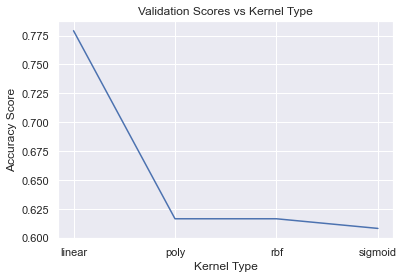

In [18]:
acc = []

for kernel in params["kernel"]:
    y_pred = SVC(kernel=kernel, degree=8).fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["kernel"], acc)
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy Score")
plt.title("Validation Scores vs Kernel Type")
plt.show()

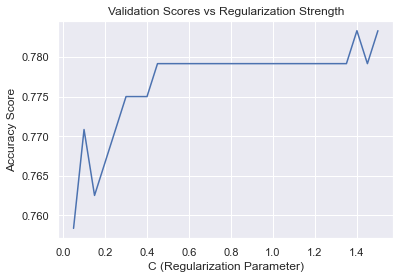

In [19]:
acc = []

for c in params["C"]:
    y_pred = SVC(C=c, kernel="linear").fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["C"], acc)
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy Score")
plt.title("Validation Scores vs Regularization Strength")
plt.show()